In [226]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

In [230]:
train= pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [231]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [232]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [235]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Cleaning

#### Age

In [236]:
age_avg_train = train['Age'].mean()
age_std_train = train['Age'].std()
age_null_count = train['Age'].isnull().sum()
age_null_random_list = np.random.randint(age_avg_train - age_std_train, age_avg_train + age_std_train, size=age_null_count)

train['Age'][np.isnan(train['Age'])] = age_null_random_list
train['Age'] = train['Age'].astype(int)

In [237]:
train['CategoricalAge'] = pd.cut(train['Age'], 5)

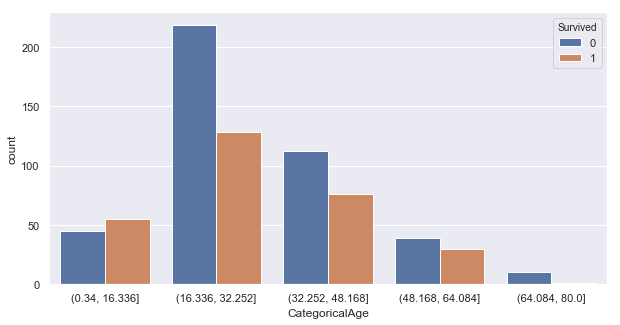

In [117]:
plt.figure(figsize=[10,5])
sns.countplot(train.CategoricalAge, hue=train['Survived'])

In [238]:
train.loc[train['Age']<=16, 'Age' ]=0
train.loc[(train['Age']>16) & (train['Age']<=32), 'Age']=1
train.loc[(train['Age']>32) & (train['Age']<=48), 'Age']=2
train.loc[(train['Age']>48) & (train['Age']<=64), 'Age']=3
train.loc[train['Age']>64, 'Age' ]=4

In [239]:
age_avg_test = test['Age'].mean()
age_std_test = test['Age'].std()
age_null_count = test['Age'].isnull().sum()
age_null_random_list = np.random.randint(age_avg_test - age_std_test, age_avg_test + age_std_test, size=age_null_count)

test['Age'][np.isnan(test['Age'])] = age_null_random_list
test['Age'] = test['Age'].astype(int)

test.loc[test['Age']<=16, 'Age' ]=0
test.loc[(test['Age']>16) & (test['Age']<=32), 'Age']=1
test.loc[(test['Age']>32) & (test['Age']<=48), 'Age']=2
test.loc[(test['Age']>48) & (test['Age']<=64), 'Age']=3
test.loc[test['Age']>64, 'Age' ]=4

#### Title

In [240]:
train['Title']=train['Name'].str.extract(' ([A-Za-z]+)\.')

train['Namelength']= train['Name'].apply(len)

train['Title']=train['Title'].replace(['Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess','Jonkheer','Don', 'Rev', 'Dr' ], 'Rare')
train['Title']=train['Title'].replace(['Mme', 'Ms','Mlle'], 'Miss')

train['Title'] = train['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})

In [241]:
test['Title']=test['Name'].str.extract(' ([A-Za-z]+)\.')

test['Namelength']= test['Name'].apply(len)

test['Title']=test['Title'].replace(['Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess','Jonkheer','Don', 'Rev', 'Dr' ], 'Rare')
test['Title']=test['Title'].replace(['Mme', 'Ms','Mlle'], 'Miss')

test['Title'] = test['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})


test['Title']=test['Title'].fillna('5')

#### Fare

In [178]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [242]:
train.loc[train['Fare']<=7.91, 'Fare' ]=0
train.loc[(train['Fare']>7.91) & (train['Fare']<=14.454), 'Fare']=1
train.loc[(train['Fare']>14.454) & (train['Fare']<=31), 'Fare']=2
train.loc[(train['Fare']>31), 'Fare']=3
train['Fare']=train['Fare'].astype(int)

test['Fare'].fillna(35.62, inplace=True)
test.loc[test['Fare']<=7.91, 'Fare' ]=0
test.loc[(test['Fare']>7.91) & (test['Fare']<=14.454), 'Fare']=1
test.loc[(test['Fare']>14.454) & (test['Fare']<=31), 'Fare']=2
test.loc[(test['Fare']>31), 'Fare']=3
test['Fare']=test['Fare'].astype(int)

#### SibSp, Parch, Embarked, Sex

In [243]:
train['Family']= train['SibSp'] + train['Parch']+1
test['Family']= test['SibSp'] + test['Parch']+1

train['Embarked']=train['Embarked'].fillna('S')

train['Embarked'] = train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test['Embarked'] = test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train['Sex'] = train['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
test['Sex'] = test['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [244]:
train.drop(['PassengerId','Name', 'Ticket','SibSp','Embarked','Cabin','Parch','CategoricalAge'], axis=1, inplace=True)
test.drop(['Name', 'Ticket','SibSp','Embarked','Cabin','Parch'], axis=1, inplace=True)

train.shape, test.shape

((891, 8), (418, 8))

## Predictive Modeling

In [183]:
y=np.asarray(train['Survived'])

train.drop(['Survived'], axis=1, inplace=True)

x=np.asarray(train)

#### Logistic Regression

In [204]:
ts= time.time()
parameter=[{'C':[10,7,5,2,1,0.1,0.01]}]

LR= LogisticRegression()

LRgrid=GridSearchCV(LR, parameter, cv=7,scoring='f1')

LRgrid.fit(x, y)

print("\nIt took",np.round((time.time()-ts)/60,3),"minutes to run." )

LRgrid.best_score_


It took 0.011 minutes to run.


0.7379460928924473

#### K Nearest Neigbours

In [215]:
ts= time.time()
parameter=[{'n_neighbors':[5,6,7,8,9,10,11,12,13,14,15],
           'weights':['distance', 'uniform'],
           'p':[1,2]}]

KNN= KNeighborsClassifier()

KNNgrid=GridSearchCV(KNN, parameter, cv=7,scoring='f1')

KNNgrid.fit(x, y)

print("\nIt took",np.round((time.time()-ts)/60,3),"minutes to run." )

KNNgrid.best_score_


It took 0.165 minutes to run.


0.740264588546065

#### Decision Trees

In [213]:
ts= time.time()

parameter=[{'criterion':["entropy","gini"],
           'max_depth':[2,3,4,5,6],
           'min_samples_leaf':[1,2,3,4,5,6,7,8,],
           'min_samples_split':[2,3,4,5,6]}]

DT= DecisionTreeClassifier()

DTgrid=GridSearchCV(DT, parameter, cv=7,scoring='f1')

DTgrid.fit(x, y)

print("\nIt took",np.round((time.time()-ts)/60,3),"minutes to run." )

DTgrid.best_score_


It took 0.446 minutes to run.


0.7802134854523467

### Ensemble Model: 
#### Random Forest

In [216]:
ts= time.time()
parameter=[{'n_estimators':[50,100],
           'max_depth':[3,4,5,6,7],
           'min_samples_split':[2,3,4,5],
           'max_features':[1,2,3,4,5]}]

RF=RandomForestClassifier(n_jobs=-1)

RFgrid=GridSearchCV(RF, parameter, cv=7,scoring='f1')

RFgrid.fit(x, y)
print("\nIt took",np.round((time.time()-ts)/60,3),"minutes to run." )
RFgrid.best_score_


It took 17.603 minutes to run.


0.7762353116091573

### Prediction of test data using Descision Tree Classifier

In [224]:
idd=np.asarray(test['PassengerId'])
xx=np.asarray(test.drop('PassengerId', axis=1))
predict= DTgrid.predict(xx)

In [228]:
Submission = pd.DataFrame({ 'PassengerId': idd,
                            'Survived': predict })
Submission.to_csv("submit.csv", index=False)